In [1]:
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


https://www.kaggle.com/datasets/tunguz/used-car-auction-prices
es el link al dataset en kaggle.

Justificación del problema de clasificación
El dataset tiene datos de substats de automóviles históricas. Contiene información sobre los precios de venta de automóviles y otras características relevantes. Nosotras estamos interesadas en predecir si el precio de un automóvil será mayor o menor a un cierto umbral. Esto se traduce en un problema de clasificación binaria.

In [2]:
file_path = 'car_prices.csv'
car_ds = pd.read_csv(file_path, delimiter=',', quotechar='"', on_bad_lines='skip')
car_ds.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
car_ds.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
car_ds.describe()
car_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72499 entries, 0 to 72498
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          72499 non-null  int64  
 1   make          72199 non-null  object 
 2   model         72181 non-null  object 
 3   trim          71978 non-null  object 
 4   body          70332 non-null  object 
 5   transmission  63795 non-null  object 
 6   vin           72499 non-null  object 
 7   state         72499 non-null  object 
 8   condition     60707 non-null  float64
 9   odometer      72424 non-null  float64
 10  color         72338 non-null  object 
 11  interior      72338 non-null  object 
 12  seller        72499 non-null  object 
 13  mmr           72499 non-null  int64  
 14  sellingprice  72499 non-null  int64  
 15  saledate      72498 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 8.9+ MB


In [ ]:
car_ds = car_ds[["year", "condition", "odometer", "mmr", "sellingprice"]]

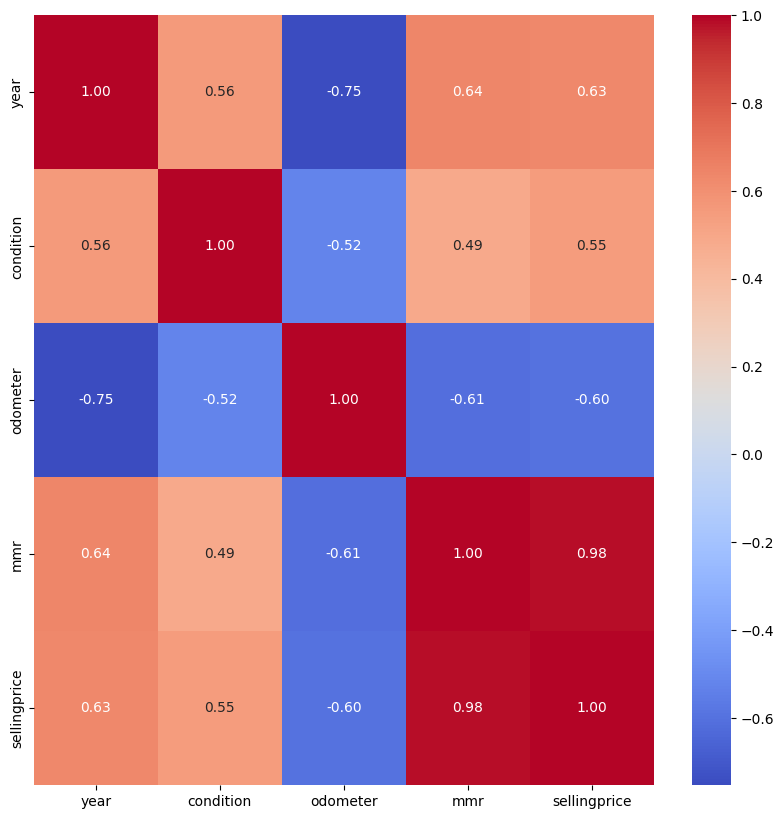

In [ ]:
cm = car_ds.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
#Este estilo de mapa muestra como algunas columnas si tienen corelacion positiva,
#si tienen relaciones negativas o hay independencias entre las variables.

mmr y sellingprice tienen una alta correlación positiva, esto sugiere que a medida que aumenta el MMR, también aumenta el precio de venta. odometer y sellingprice, donde una alta lectura del odómetro podría estar asociada con un menor precio de venta.

In [ ]:
# Crear la variable de salida binaria (target)
Y = car_ds["sellingprice"] > 25000
X_cont = car_ds[["year", "odometer", "mmr"]]
 # Solo atributos numéricos continuos

Precision: 0.9227467811158798
ROC AUC: 0.9955451885126734


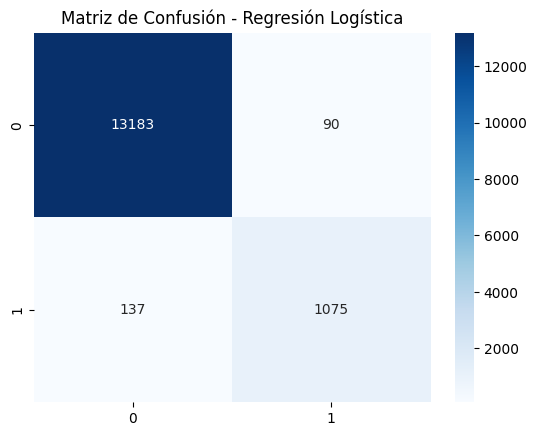

In [ ]:
#Modelo de Regresión Logística con atributos numéricos continuos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#limpiamos los valores que son nulos
X_cont = X_cont.dropna()
Y = Y.loc[X_cont.index]

#dividimos el dataset entre los de entrenamiento y los de prueba
X_train, X_test, y_train, y_test = train_test_split(X_cont, Y, test_size=0.2, random_state=42)

#entrenamos el modelo de regrecion logistica
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

#hacemos las predicciones
y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]

#evaluamos la presicion, el ROC y el AUC
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Precision:", precision)
print("ROC AUC:", roc_auc)

#matris de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

Precision (Árbol de Decisión): 0.8662207357859532
ROC AUC (Árbol de Decisión): 0.9213654658617372


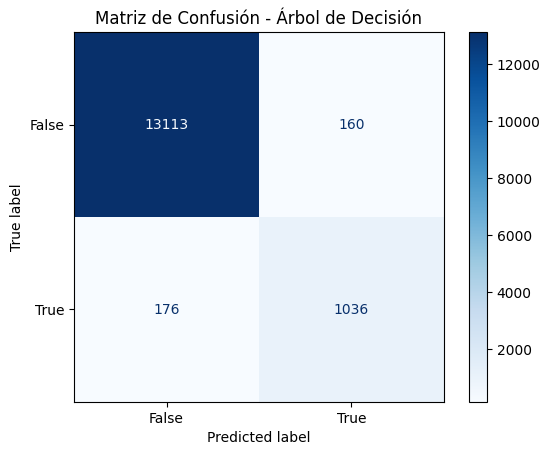

In [ ]:
#Modelo de Árbol de Decisión con atributos numéricos continuos
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, roc_auc_score

#entrenamos el modelo de arbol de desicion
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

#hacemos las predicciones
y_pred_tree = tree_model.predict(X_test)
y_pred_prob_tree = tree_model.predict_proba(X_test)[:, 1]

#evaluamos la presicion, el ROC y el AUC
precision_tree = precision_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)

print("Precision (Árbol de Decisión):", precision_tree)
print("ROC AUC (Árbol de Decisión):", roc_auc_tree)

#matris de confusion
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

Precision (Combinado): 0.9281818181818182
ROC AUC (Combinado): 0.9961603013168837


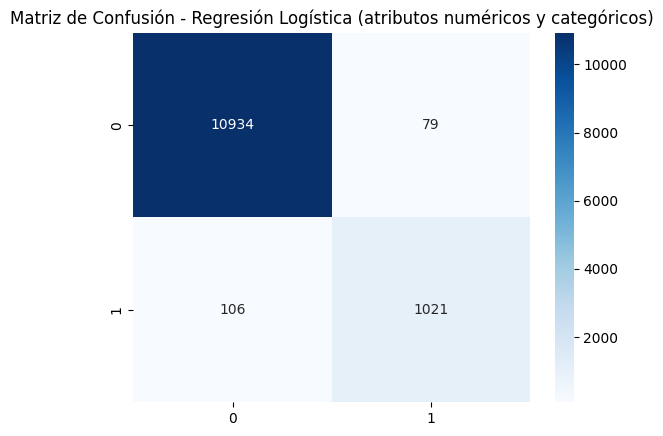

In [ ]:
#Modelo de Regresión Logística con atributos numéricos y categóricos


#Selecciono los atributos numericos y los atributos categoricos
X_combined = car_ds[["year", "odometer", "mmr", "condition"]]

#limpiamos los valores nulos
X_combined = X_combined.dropna()
Y = Y.loc[X_combined.index]

#dividimos el datatest en entrenamiento y en prueba
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y, test_size=0.2, random_state=42)

#creamos pipeline para poder usar los categoricos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

#definimos el procesamiento para escalar los numericos y codificar los categoricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["year", "odometer", "mmr"]),
        ('cat', OneHotEncoder(), ["condition"])
    ])

#definimos el pipeline de la regresion logistica
log_model_combined = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))])

#entrenamos el modelo
log_model_combined.fit(X_train_combined, y_train_combined)

#hacemos las predicciones
y_pred_combined = log_model_combined.predict(X_test_combined)
y_pred_prob_combined = log_model_combined.predict_proba(X_test_combined)[:, 1]

#evaluamos la presicion, el ROC y el AUC
precision_combined = precision_score(y_test_combined, y_pred_combined)
roc_auc_combined = roc_auc_score(y_test_combined, y_pred_prob_combined)

print("Precision (Combinado):", precision_combined)
print("ROC AUC (Combinado):", roc_auc_combined)

#matris de confusion
conf_matrix_combined = confusion_matrix(y_test_combined, y_pred_combined)
sns.heatmap(conf_matrix_combined, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística (atributos numéricos y categóricos)')
plt.show()

Precision (Árbol Combinado): 0.8636363636363636
ROC AUC (Árbol Combinado): 0.9395425717336074


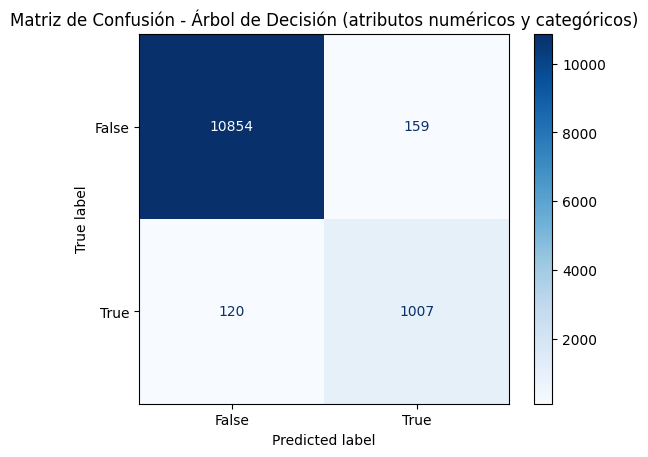

In [ ]:
#Modelo de Árbol de Decisión con atributos numéricos y categóricos
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, roc_auc_score

#definimos el pipeline del arbol de desicion
tree_model_combined = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])

#entrenamos el modelo
tree_model_combined.fit(X_train_combined, y_train_combined)

#hacemos las predicciones
y_pred_tree_combined = tree_model_combined.predict(X_test_combined)
y_pred_prob_tree_combined = tree_model_combined.predict_proba(X_test_combined)[:, 1]

#evaluamos la presicion, el ROC y el AUC
precision_tree_combined = precision_score(y_test_combined, y_pred_tree_combined)
roc_auc_tree_combined = roc_auc_score(y_test_combined, y_pred_prob_tree_combined)

print("Precision (Árbol Combinado):", precision_tree_combined)
print("ROC AUC (Árbol Combinado):", roc_auc_tree_combined)

#matris de confusion
ConfusionMatrixDisplay.from_estimator(tree_model_combined, X_test_combined, y_test_combined, cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión (atributos numéricos y categóricos)')
plt.show()

Precision (Mejor Árbol): 0.9130824372759857
ROC AUC (Mejor Árbol): 0.9956612138062857


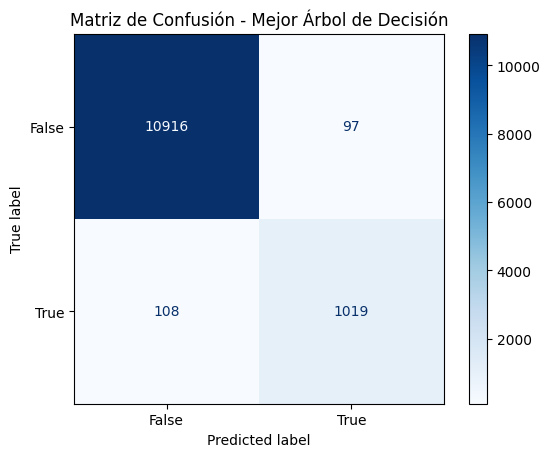

In [ ]:
#Exploración de Hiperparámetros para el Árbol de Decisión
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, roc_auc_score

#definimos los hiperparametros que vamos a usar para explorar
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

#creamos el gridSearchCV
grid_search = GridSearchCV(tree_model_combined, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_combined, y_train_combined)

#mejoramos el modelo y la evaluacion
best_tree_model = grid_search.best_estimator_
y_pred_best_tree = best_tree_model.predict(X_test_combined)
y_pred_prob_best_tree = best_tree_model.predict_proba(X_test_combined)[:, 1]

#evaluamos la presicion, el ROC y el AUC
precision_best_tree = precision_score(y_test_combined, y_pred_best_tree)
roc_auc_best_tree = roc_auc_score(y_test_combined, y_pred_prob_best_tree)

print("Precision (Mejor Árbol):", precision_best_tree)
print("ROC AUC (Mejor Árbol):", roc_auc_best_tree)

#matris de confusion
ConfusionMatrixDisplay.from_estimator(best_tree_model, X_test_combined, y_test_combined, cmap='Blues')
plt.title('Matriz de Confusión - Mejor Árbol de Decisión')
plt.show()